In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
titanic_df = pd.read_csv('train.csv')

In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# who were the passengers on the Titanic

<AxesSubplot: >

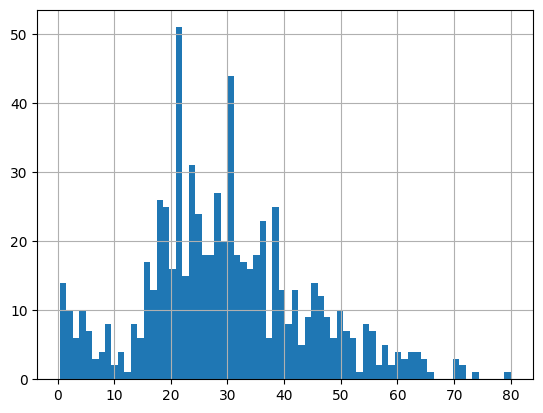

In [15]:
titanic_df['Age'].hist(bins=70)

In [16]:
titanic_df['Age'].mean()

29.69911764705882

<AxesSubplot: >

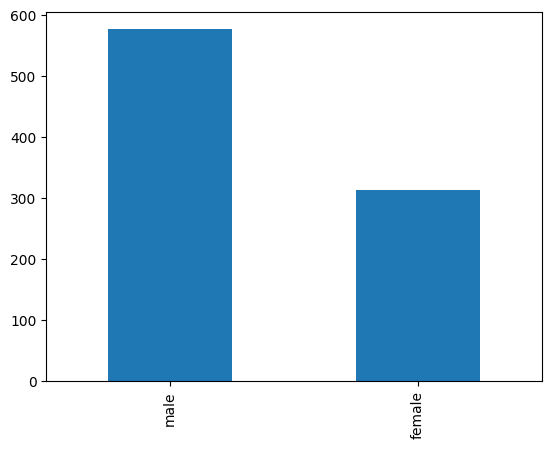

In [40]:
titanic_df['Sex'].value_counts().plot(kind = 'bar')

In [18]:
df1 = titanic_df[['Sex','Pclass']]

<AxesSubplot: xlabel='Pclass'>

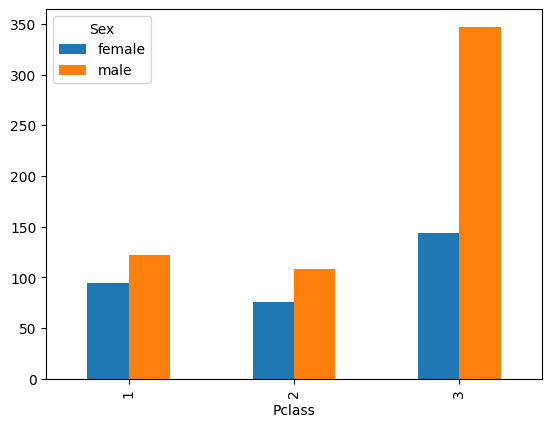

In [19]:
pd.crosstab(titanic_df.Pclass,titanic_df.Sex).plot(kind="bar")

<AxesSubplot: xlabel='Sex'>

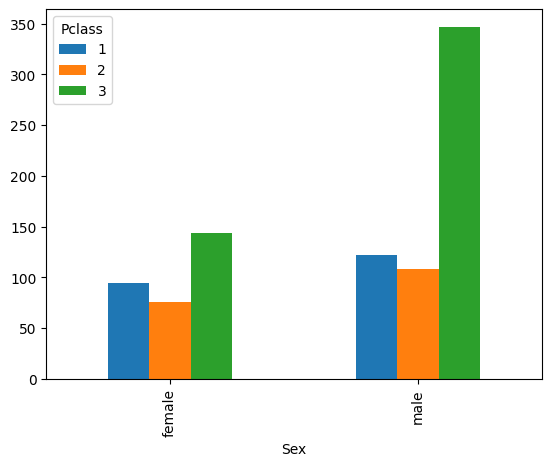

In [20]:
df1.groupby("Sex").Pclass.value_counts().unstack().plot(kind='bar')

Add colomn to data to get cild and adult

In [21]:
def male_female_child(passengers):
    age,sex = passengers
    if age < 16:
        return 'child'
    else:
        return sex

In [22]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [23]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [24]:
df2 = titanic_df[['Person','Pclass']]

<AxesSubplot: xlabel='Pclass'>

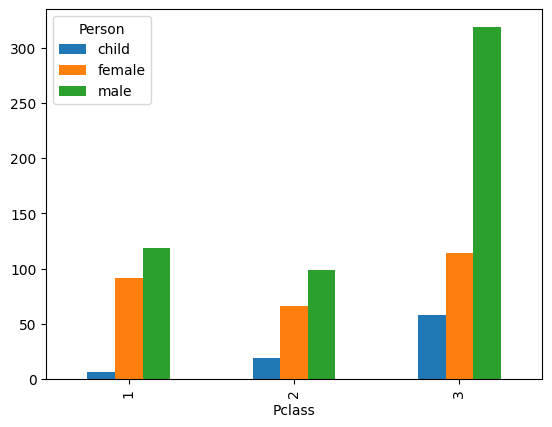

In [25]:
df2.groupby("Pclass").Person.value_counts().unstack().plot(kind='bar')

c:\Users\vigne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\vigne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\vigne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


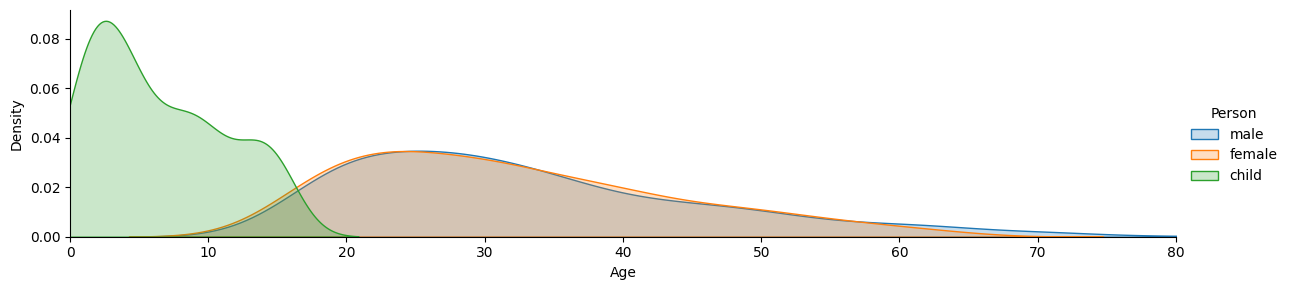

In [26]:
fig = sns.FacetGrid(titanic_df,hue = 'Person',aspect = 4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

c:\Users\vigne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\vigne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\vigne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


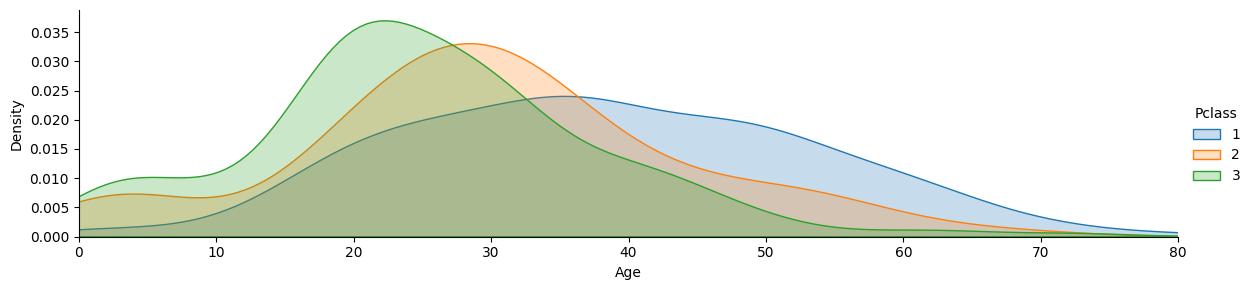

In [27]:
fig = sns.FacetGrid(titanic_df,hue = 'Pclass',aspect = 4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

#  Where passengers came from

In [28]:
titanic_df.groupby("Embarked").Pclass.value_counts().unstack()

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


<AxesSubplot: xlabel='Embarked'>

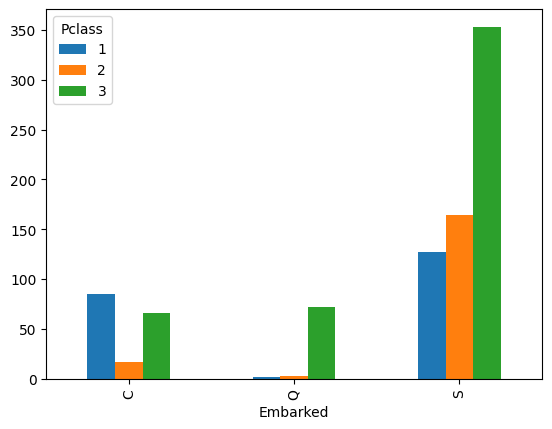

In [29]:
titanic_df.groupby("Embarked").Pclass.value_counts().unstack().plot(kind='bar')

# who is alone and with family


In [30]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [31]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [32]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\vigne\AppData\Local\Temp\ipykernel_36216\230142470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'


In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<AxesSubplot: >

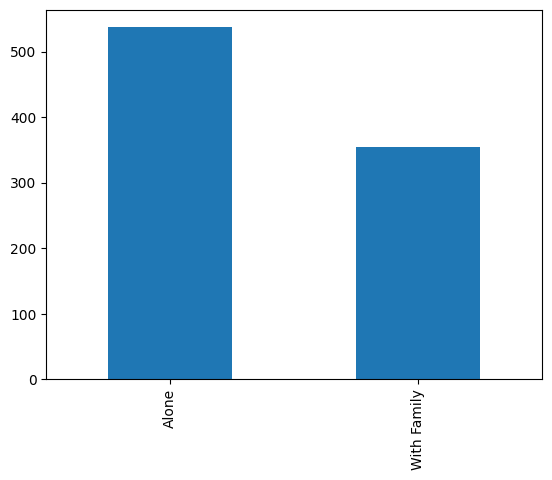

In [34]:
titanic_df.Alone.value_counts().plot(kind = 'bar')

# Who Survied 

In [35]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


<AxesSubplot: ylabel='Survivor'>

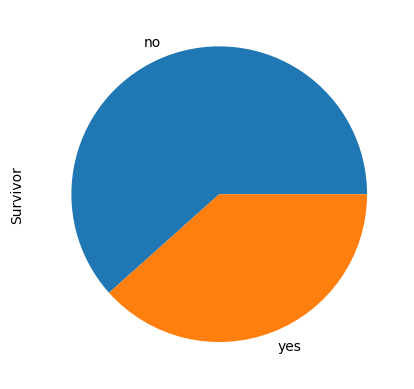

In [37]:
titanic_df.Survivor.value_counts().plot(kind = 'pie')

Factors made for the people to survial 

In [47]:
#BY Gender and BY age group

<AxesSubplot: xlabel='Person'>

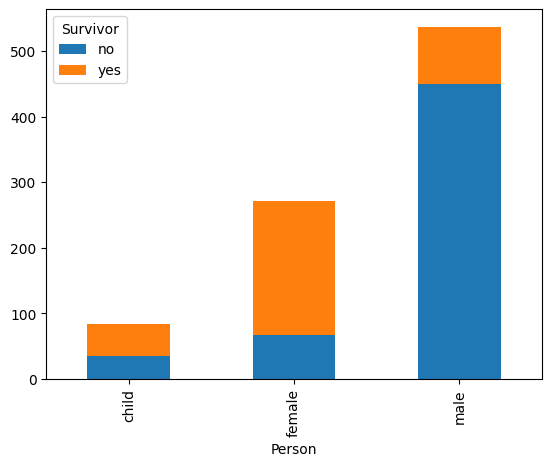

In [42]:
pd.crosstab(titanic_df.Person,titanic_df.Survivor).plot(kind = 'bar',stacked = True)

<AxesSubplot: xlabel='Sex'>

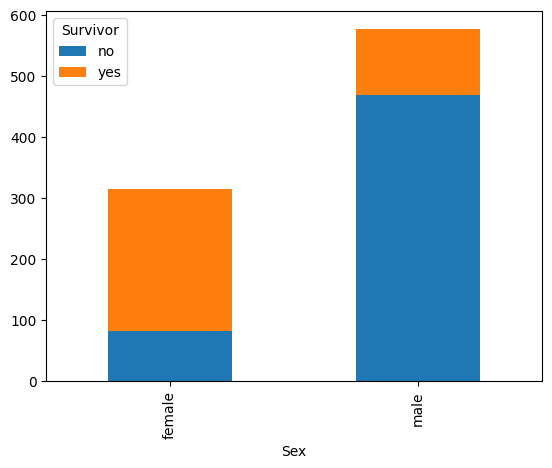

In [43]:
pd.crosstab(titanic_df.Sex,titanic_df.Survivor).plot(kind = 'bar',stacked=True)

By class

<AxesSubplot: xlabel='Pclass'>

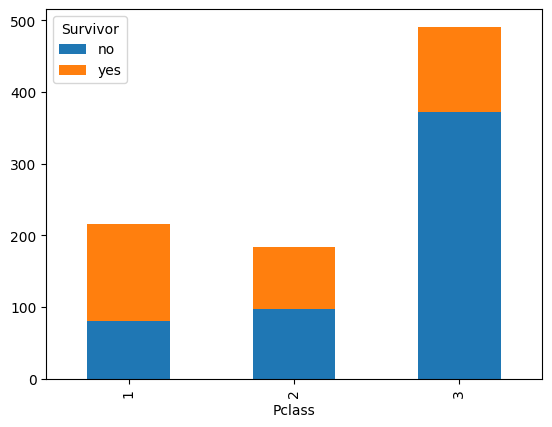

In [44]:
pd.crosstab(titanic_df.Pclass,titanic_df.Survivor).plot(kind = 'bar',stacked = True)

With Family members

<AxesSubplot: xlabel='Alone'>

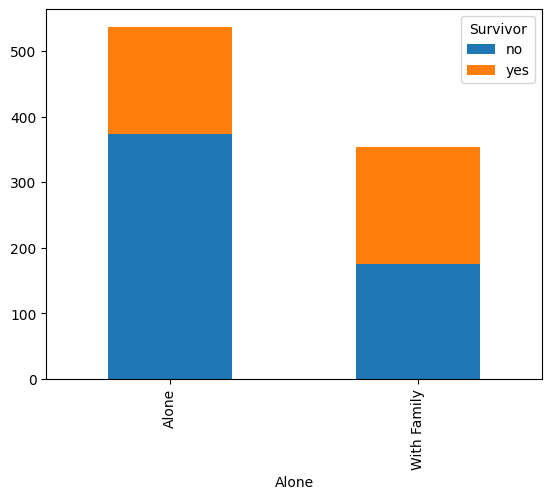

In [45]:
pd.crosstab(titanic_df.Alone,titanic_df.Survivor).plot(kind = 'bar',stacked = True)

By Age

Survivor
yes    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

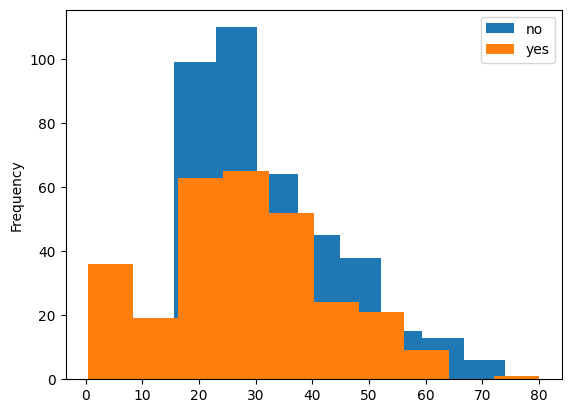

In [46]:
df3 = titanic_df[titanic_df.Survivor == 'no']
df3.groupby("Survivor").Age.plot(kind='hist',legend = True)
df4 = titanic_df[titanic_df.Survivor == 'yes']
df4.groupby("Survivor").Age.plot(kind='hist',legend = True)